In [1]:
%matplotlib inline

In [2]:
import numpy as np
data=np.load('/home/share/TmpData/Qinglin/HCP_Group/MOTOR100_0.2.npy')


In [3]:
from RBM import RBM



In [4]:
rbm1=RBM(data.shape[1],100,epochs=1)
rbm1.train(data)
h1=rbm1.predict(data)

rbm2=RBM(100,100,epochs=1)
rbm2.train(h1)
h2=rbm2.predict(h1)

rbm3=RBM(100,100,epochs=1)
rbm3.train(h2)

Epoch: 0 Batch: 0-20 Error: 6.4518266 l1: 0.0031196799
Epoch: 0 Batch: 1000-1020 Error: 0.89410317 l1: 0.0046431813
Epoch: 0 Batch: 2000-2020 Error: 2.3782182 l1: 0.0060171103
Epoch: 0 Batch: 3000-3020 Error: 0.6929434 l1: 0.005980785
Epoch: 0 Batch: 4000-4020 Error: 1.7184262 l1: 0.0069882167
Epoch: 0 Batch: 5000-5020 Error: 8.477136 l1: 0.008273762
Epoch: 0 Batch: 0-20 Error: 0.009895321 l1: 0.00011107275
Epoch: 0 Batch: 1000-1020 Error: 0.009893779 l1: 0.0005281682
Epoch: 0 Batch: 2000-2020 Error: 0.009858415 l1: 0.0005129077
Epoch: 0 Batch: 3000-3020 Error: 0.010059626 l1: 0.0005099327
Epoch: 0 Batch: 4000-4020 Error: 0.009991844 l1: 0.0005122643
Epoch: 0 Batch: 5000-5020 Error: 0.009795388 l1: 0.0005187407
Epoch: 0 Batch: 0-20 Error: 0.005546666 l1: 0.00040706305
Epoch: 0 Batch: 1000-1020 Error: 0.003263636 l1: 0.00056870654
Epoch: 0 Batch: 2000-2020 Error: 0.001576174 l1: 0.00053628767
Epoch: 0 Batch: 3000-3020 Error: 0.000837647 l1: 0.00052175485
Epoch: 0 Batch: 4000-4020 Error:

1 plot layer1
-----------------------------------------------------------



In [5]:
#from nilearn.decomposition.rbm import getW

components_img=rbm1.getW()
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
      mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fdaf0034320>,
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [6]:
components_img.shape

(228453, 100)

In [7]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

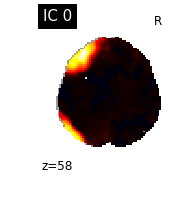

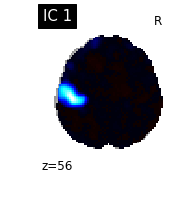

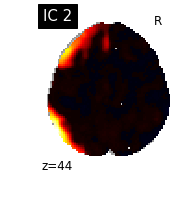

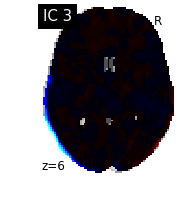

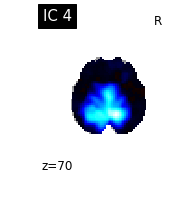

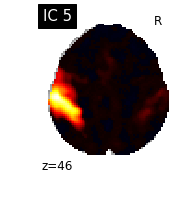

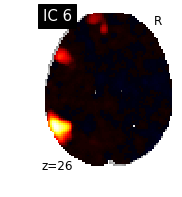

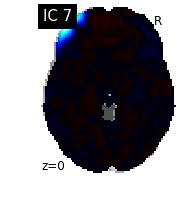

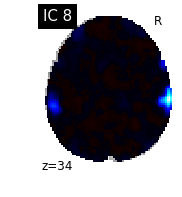

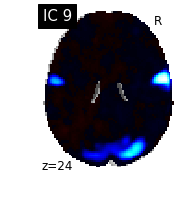

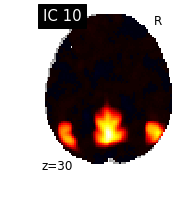

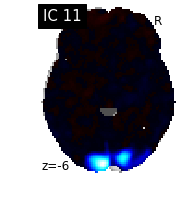

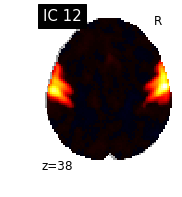

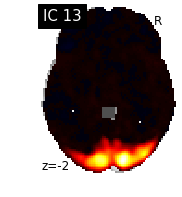

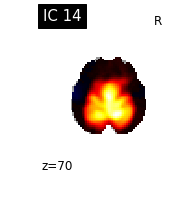

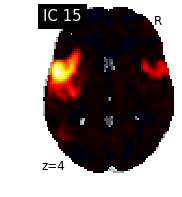

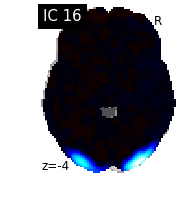

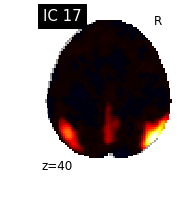

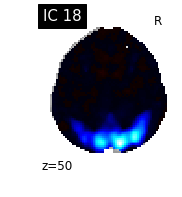

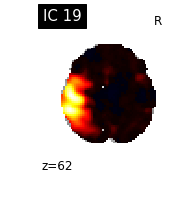

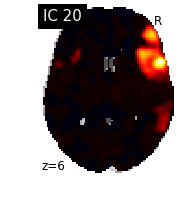

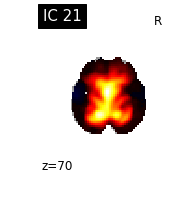

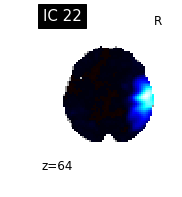

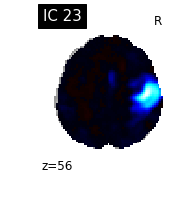

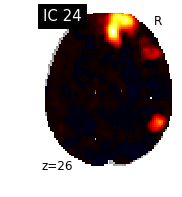

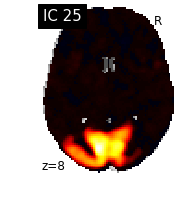

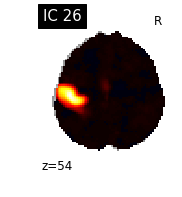

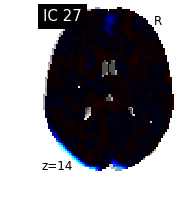

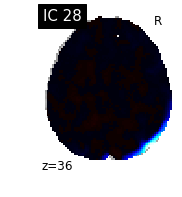

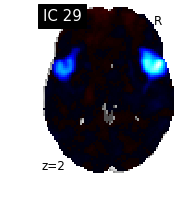

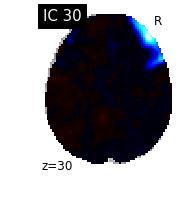

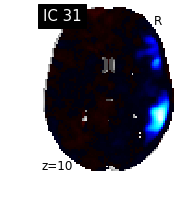

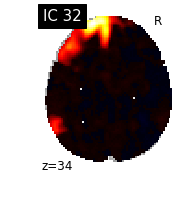

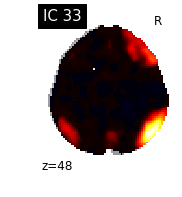

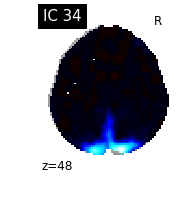

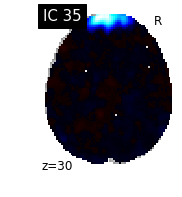

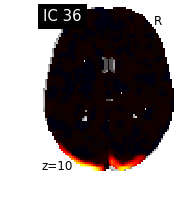

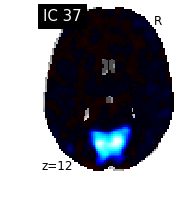

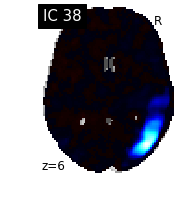

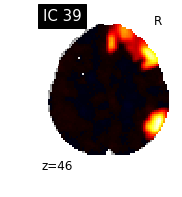

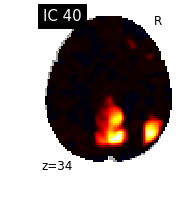

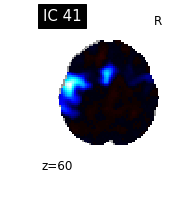

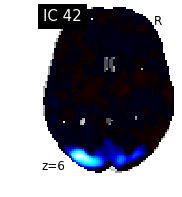

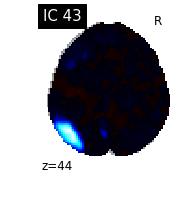

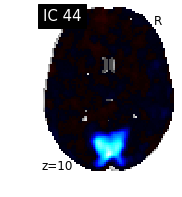

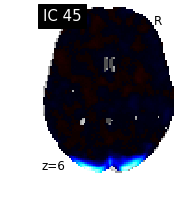

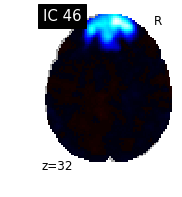

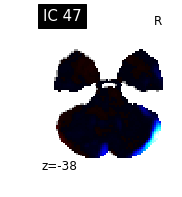

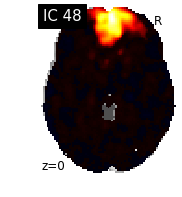

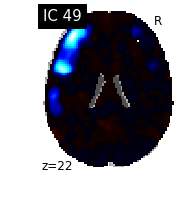

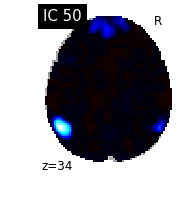

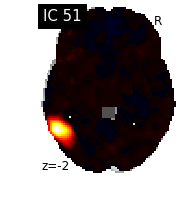

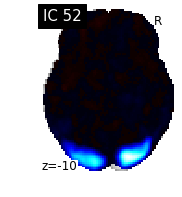

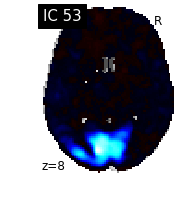

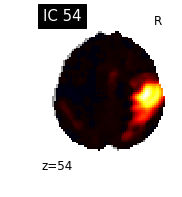

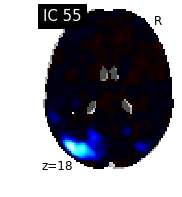

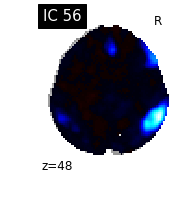

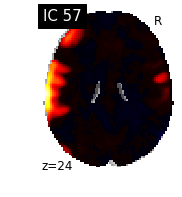

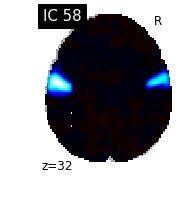

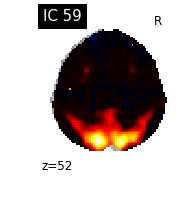

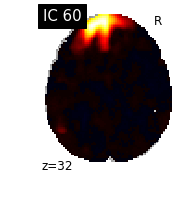

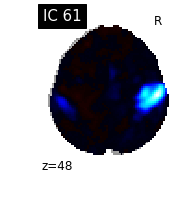

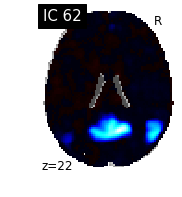

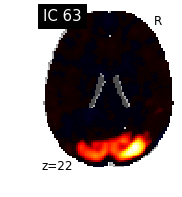

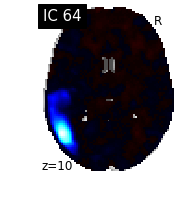

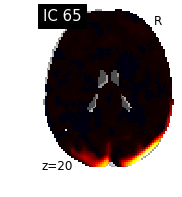

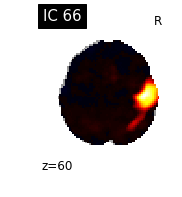

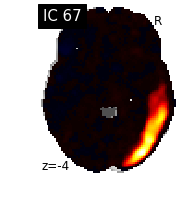

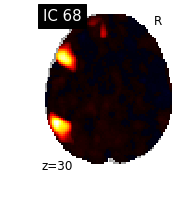

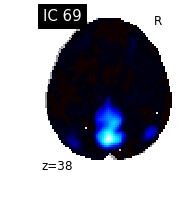

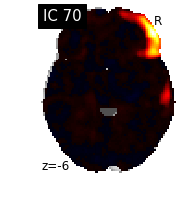

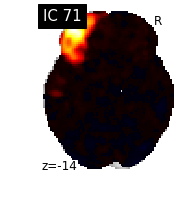

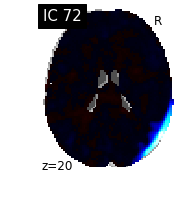

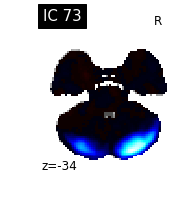

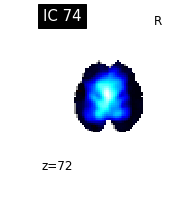

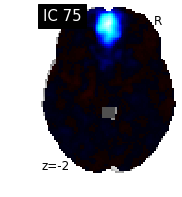

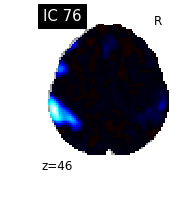

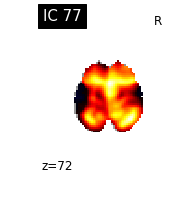

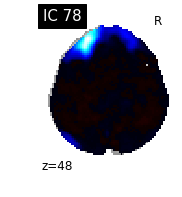

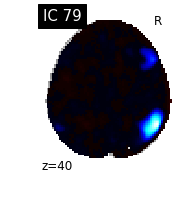

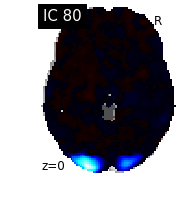

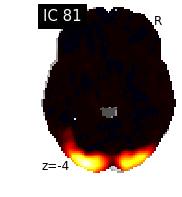

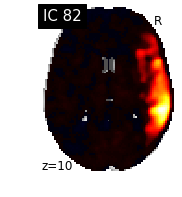

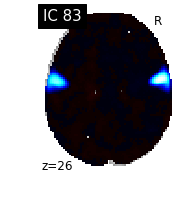

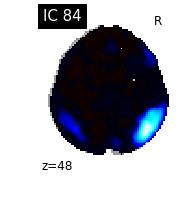

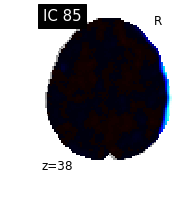

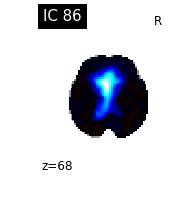

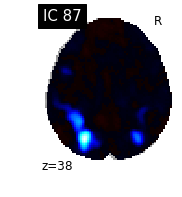

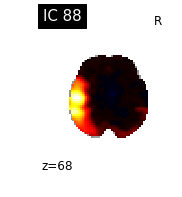

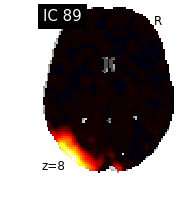

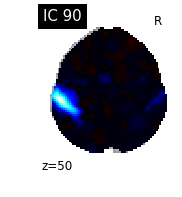

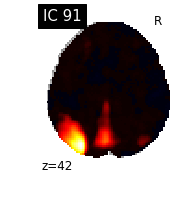

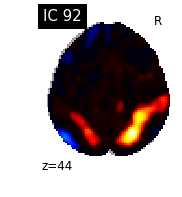

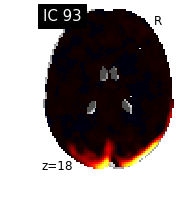

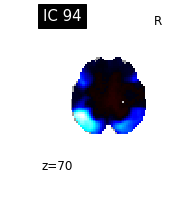

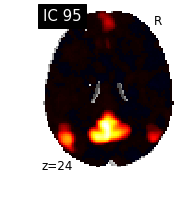

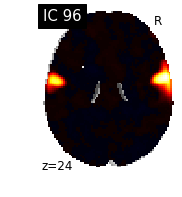

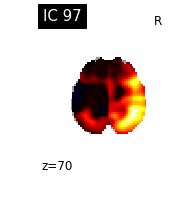

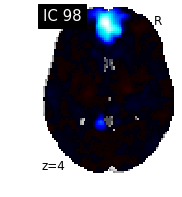

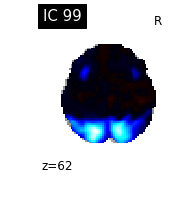

In [8]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [9]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.5/dist-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/usr/local/lib/python3.5/dist-packages/scipy/sparse/linalg/isolve/iterative.py:2: DeprecationWarning: scipy.sparse.linalg.cg called without specifying `atol`. The default value will be changed in a future release. For compatibil

ValueError: zero-size array to reduction operation maximum which has no identity

1 plot layer2
-----------------------------------------------------------



In [10]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)

import scipy
scipy.stats.mstats.zscore(components_img,axis=1)


array([[ 1.2609787 ,  1.1514177 ,  0.9790788 , ...,  0.01489351,
        -0.02585503, -0.07231281],
       [ 0.1223778 ,  0.19675866,  0.18669048, ..., -0.29367667,
        -0.23444556, -0.18103762],
       [-1.0216291 , -1.0587242 , -1.0403564 , ..., -0.5558731 ,
        -0.56447846, -0.5902931 ],
       ...,
       [ 0.04236957, -0.04972371, -0.18631706, ...,  0.47677514,
         0.47937906,  0.52439606],
       [ 0.12887661, -0.09085173, -0.31111112, ...,  0.2292484 ,
         0.12886907,  0.2021831 ],
       [ 1.578352  ,  1.7973213 ,  2.1633344 , ..., -0.1512116 ,
        -0.19897524, -0.18621457]], dtype=float32)

In [11]:
components_img.shape

(100, 228453)

In [12]:
#components_img[np.absolute(components_img) < 1.7] = 0
components_img = masker.inverse_transform(components_img)

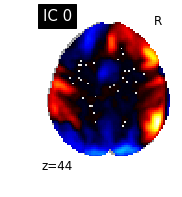

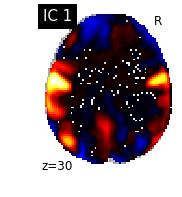

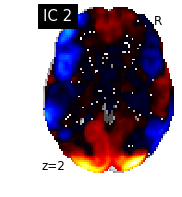

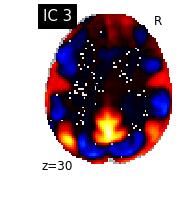

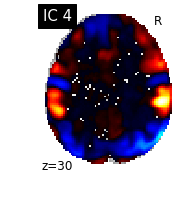

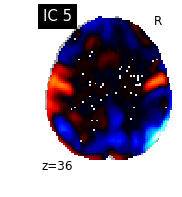

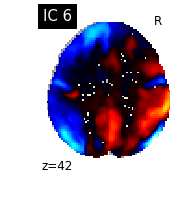

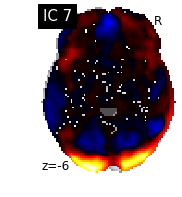

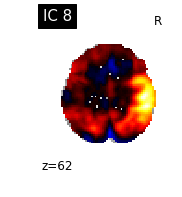

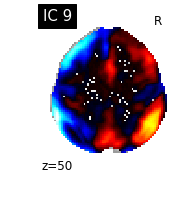

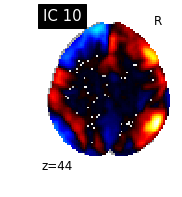

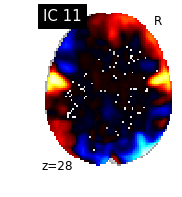

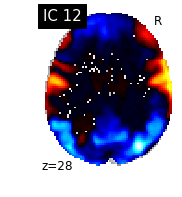

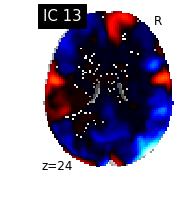

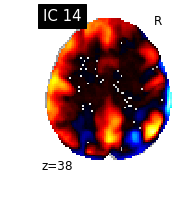

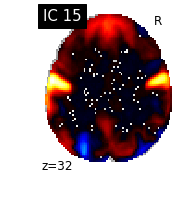

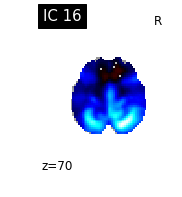

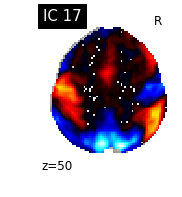

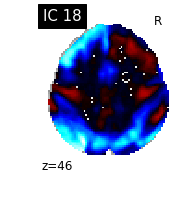

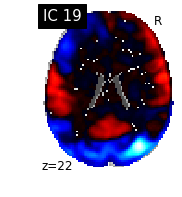

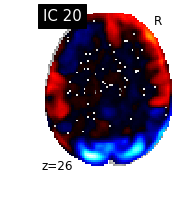

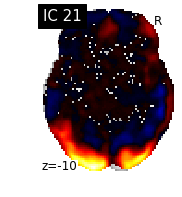

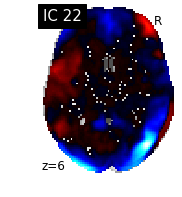

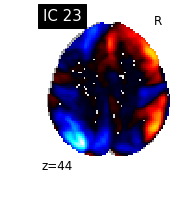

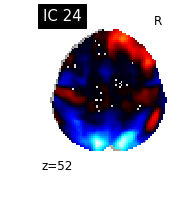

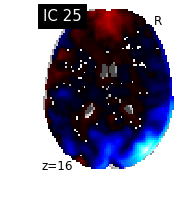

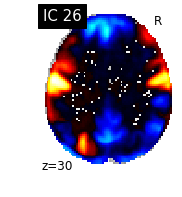

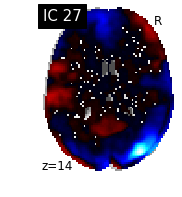

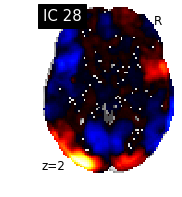

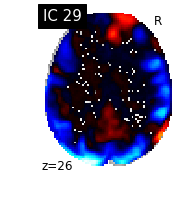

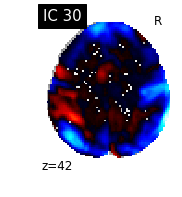

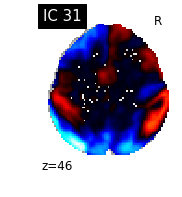

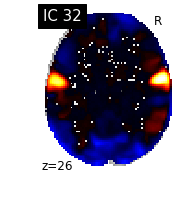

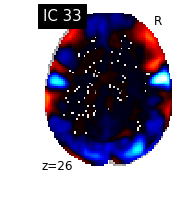

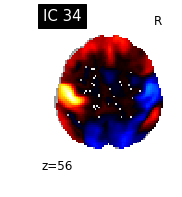

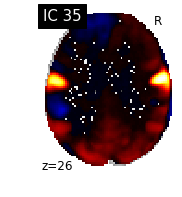

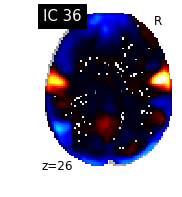

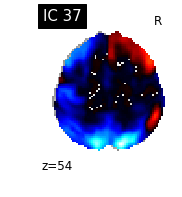

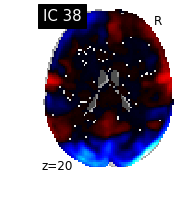

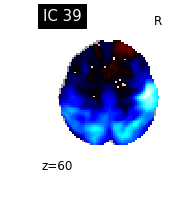

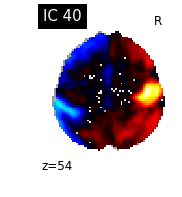

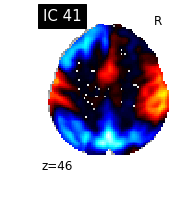

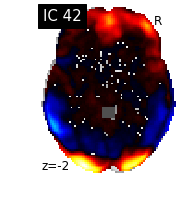

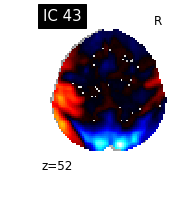

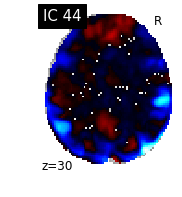

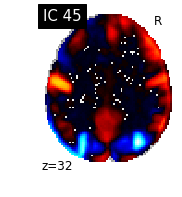

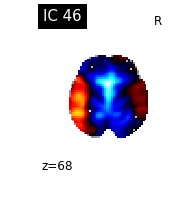

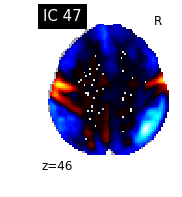

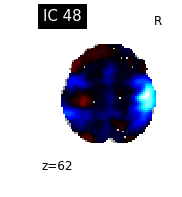

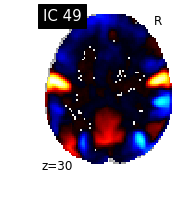

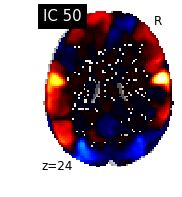

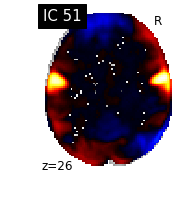

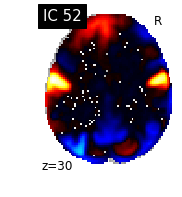

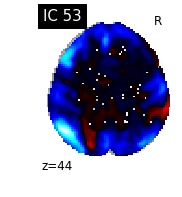

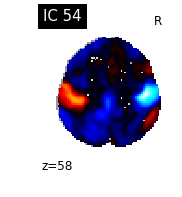

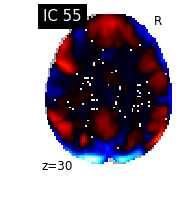

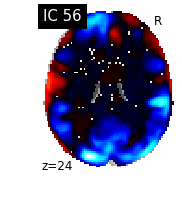

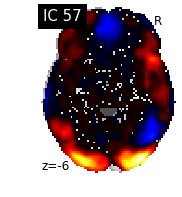

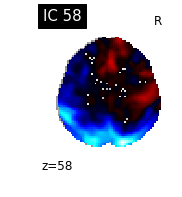

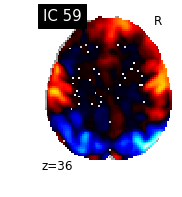

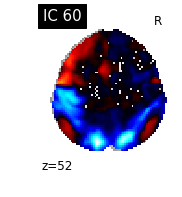

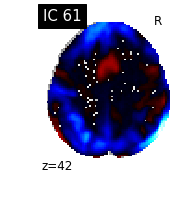

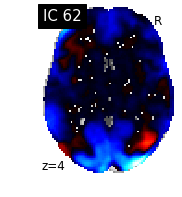

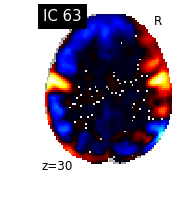

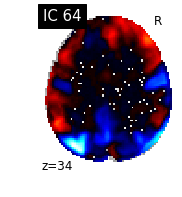

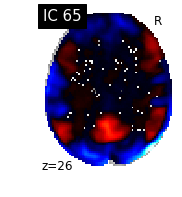

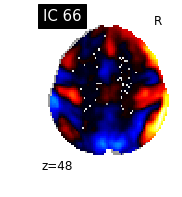

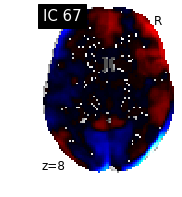

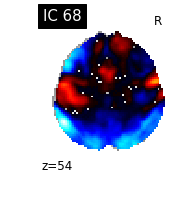

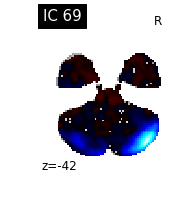

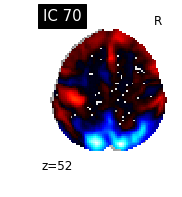

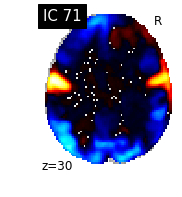

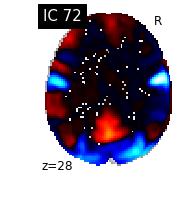

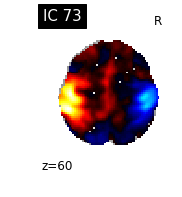

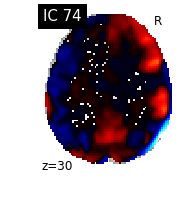

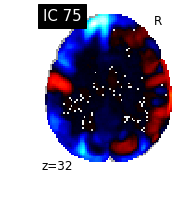

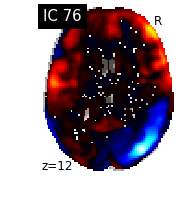

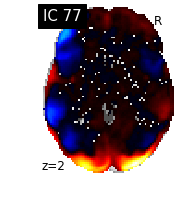

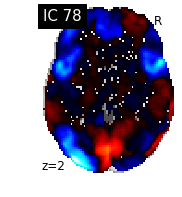

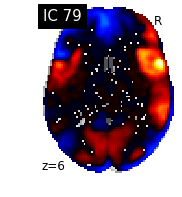

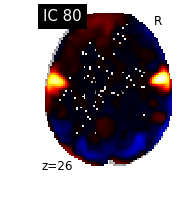

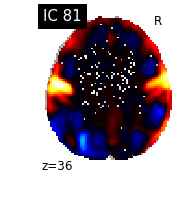

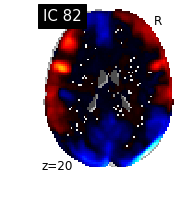

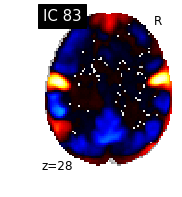

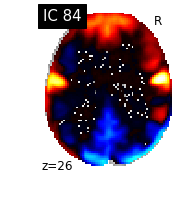

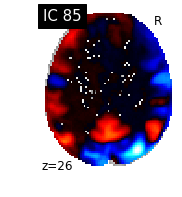

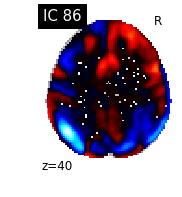

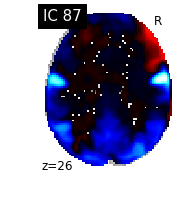

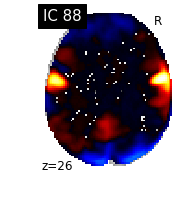

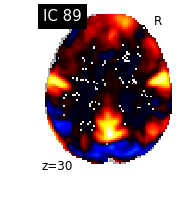

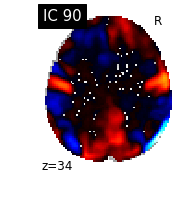

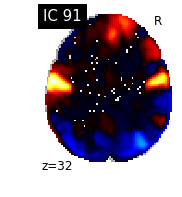

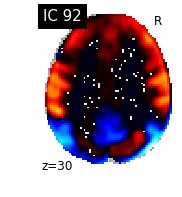

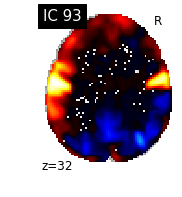

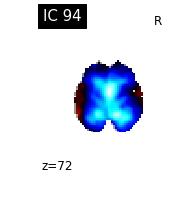

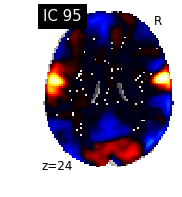

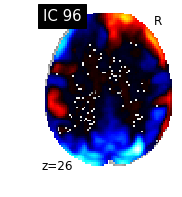

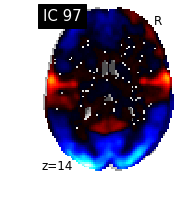

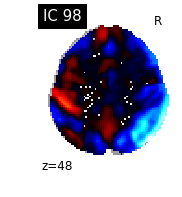

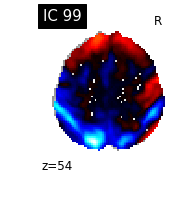

In [13]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [ ]:
components_img.shape

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

1 plot layer3
-----------------------------------------------------------



In [ ]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
components_img=np.matmul(components_img,rbm3.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

In [ ]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)